In [2]:
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import plot_model

A1 = Input(shape=(30,),name='A1')
A2 = Dense(8, activation='relu',name='A2')(A1)
A3 = Dense(30, activation='relu',name='A3')(A2)

B2 = Dense(40, activation='relu',name='B2')(A2)
B3 = Dense(30, activation='relu',name='B3')(B2)

merged = Model(inputs=[A1],outputs=[A3,B3])

plot_model(merged,to_file='demo.png',show_shapes=True)

C:\Users\kmura\AppData\Local\Programs\Python\Python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Use the retry module or similar alternatives.


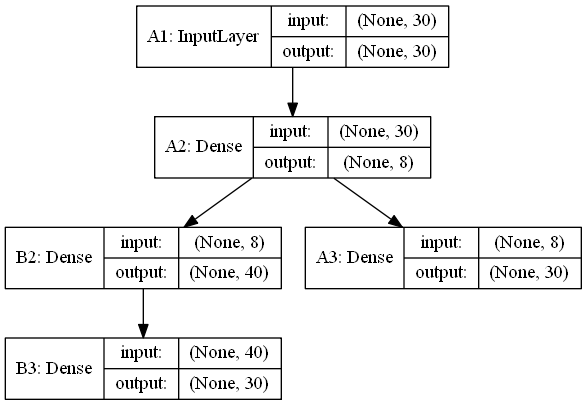

In [3]:
from IPython.display import Image
Image("demo.png")

In [4]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import TimeDistributed,Activation

from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.preprocessing import sequence
from keras.utils import to_categorical
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()

In [5]:
length=23138
embedding_vecor_length=300
max_sentence_length=30
pos_map_length=38

model = Sequential()

model.add(Embedding(length, embedding_vecor_length, input_length=max_sentence_length))

model.add(LSTM(300,return_sequences=True))
model.add(LSTM(300,return_sequences=True))

model.add(TimeDistributed(Dense(pos_map_length)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

print(model.summary())


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 300)           6941400   
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 300)           721200    
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 300)           721200    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 30, 38)            11438     
_________________________________________________________________
activation_1 (Activation)    (None, 30, 38)            0         
Total params: 8,395,238
Trainable params: 8,395,238
Non

# ***** Actual required Design for the model *******

In [10]:
max_input_length=30
embedding_dim=300
vocab_size=23138
hidden_dim=200
pos_tag_size=38


main_input = Input(shape=(max_input_length,), dtype='float32', name='main_input')

# This embedding layer will encode the input sequence
# into a sequence of dense 512-dimensional vectors.
x = Embedding(output_dim=embedding_dim, input_dim=vocab_size, input_length=max_input_length)(main_input)

# A LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence
lstm_out,state_h, state_c = LSTM(hidden_dim,return_sequences=True, return_state=True)(x)
print(lstm_out.shape)

auxiliary_output = TimeDistributed(Dense(pos_tag_size, activation='sigmoid'), name='aux_output')(lstm_out)

# auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

# auxiliary_input = Input(shape=(5,), name='aux_input')
# x = keras.layers.concatenate([lstm_out, auxiliary_input])


# We stack a deep densely-connected network on top
x = Dense(400, activation='relu')(state_h)
# x = Dense(64, activation='relu')(x)
# x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(vocab_size, activation='sigmoid', name='main_output')(x)

model = Model(inputs=[main_input], outputs=[main_output, auxiliary_output])

(?, ?, 200)


In [21]:
model.compile(loss={'main_output': 'categorical_crossentropy', 'aux_output': 'mse'},optimizer='rmsprop',metrics=['accuracy'])

# model.compile(optimizer='rmsprop',
#               loss={'main_output': 'binary_crossentropy', 'aux_output': 'binary_crossentropy'},
#               loss_weights={'main_output': 1., 'aux_output': 0.2})


In [22]:
plot_model(model,to_file='mine.png',show_shapes=True)

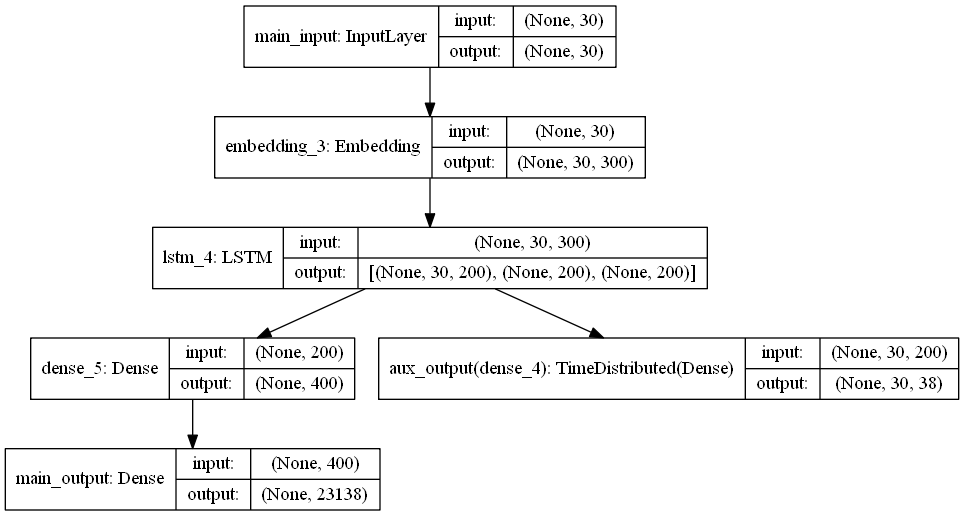

In [23]:
from IPython.display import Image
Image("mine.png")

In [24]:
import numpy as np
TRAIN_SIZE = 100
# x=np.random.uniform(0, 10, (TRAIN_SIZE, 2))
x=np.random.randint(10, size=(TRAIN_SIZE,30))
phase2_y=np.random.randint(10, size=(TRAIN_SIZE,30))
phase1_Y=np.random.randint(10, size=TRAIN_SIZE)
phase1_Y=to_categorical(phase1_Y,23138)
print(phase2_y[0])

sequences = [to_categorical(y, num_classes=38) for y in phase2_y]
phase2_y = array(sequences)


# print(phase1_Y[0])

# print(len(x))
# print(len(phase1_Y))
print(phase2_y[0])
print(phase2_y.shape)
print(phase1_Y.shape)

[1 4 8 2 8 7 9 2 0 1 8 7 0 7 7 8 9 0 6 2 9 7 6 2 7 2 3 7 7 8]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(100, 30, 38)
(100, 23138)


In [25]:
# model.add(Activation('softmax'))

model.fit(x,{'main_output':phase1_Y,'aux_output':phase2_y},epochs=20)

Epoch 1/20
100/100 [==============================] - 1s - loss: 3.2440 - main_output_loss: 3.2200 - aux_output_loss: 0.0240 - main_output_acc: 0.1100 - aux_output_acc: 0.0990     
Epoch 2/20
100/100 [==============================] - 0s - loss: 2.6433 - main_output_loss: 2.6195 - aux_output_loss: 0.0238 - main_output_acc: 0.1500 - aux_output_acc: 0.1030     
Epoch 3/20
100/100 [==============================] - 0s - loss: 2.4342 - main_output_loss: 2.4104 - aux_output_loss: 0.0237 - main_output_acc: 0.1500 - aux_output_acc: 0.0957     
Epoch 4/20
100/100 [==============================] - 0s - loss: 2.3342 - main_output_loss: 2.3105 - aux_output_loss: 0.0237 - main_output_acc: 0.1500 - aux_output_acc: 0.0907     
Epoch 5/20
100/100 [==============================] - 0s - loss: 2.3297 - main_output_loss: 2.3060 - aux_output_loss: 0.0237 - main_output_acc: 0.1500 - aux_output_acc: 0.1053     
Epoch 6/20
100/100 [==============================] - 0s - loss: 2.3139 - main_output_loss: 2.2

# < E O Required Model>

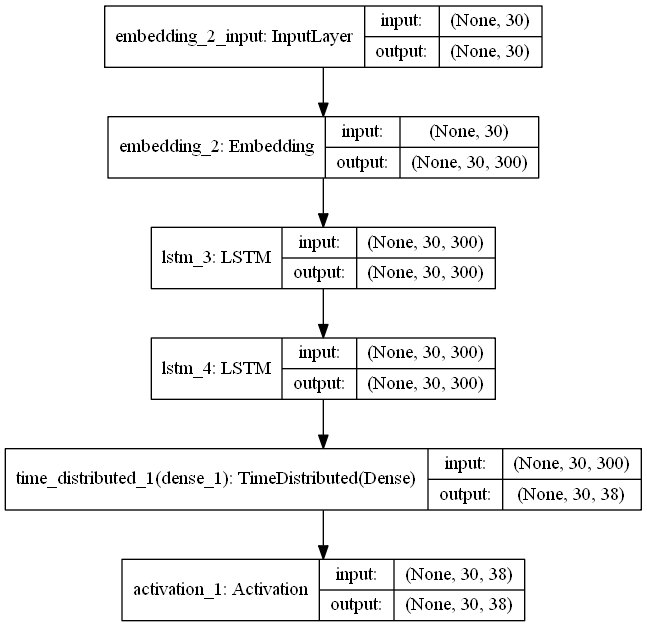

In [16]:
Image("pos_model.png")